In [1]:
from astropy.table import Table

import numpy as np

from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt
%matplotlib notebook

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from mass_ratio_plottingFunctions import median_hist, param_hist, param_hist_scatter, param_CDF

In [2]:
IMAGE_DIR = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/images/'

#data_filename = '../spirals/Pipe3D-master_file_vflag_smooth2p27_BB_10_N2O2_noWords.txt'
data_filename = '../spirals/DRP-master_file_vflag_BB_smooth1p85_mapFit_N2O2_HIdr2_noWords_v5.txt'

master_table = Table.read(data_filename, format='ascii.commented_header')

#### Calculate ratio of $R_\text{max}$ to $R_\text{turn}$

In [3]:
master_table['Rmax_Rturn_ratio'] = master_table['Rmax']/master_table['avg_r_turn']

# Galaxies that used the positive rotation curve
pos_galaxies = master_table['curve_used'] == 1
master_table['Rmax_Rturn_ratio'][pos_galaxies] = master_table['Rmax'][pos_galaxies]/master_table['pos_r_turn'][pos_galaxies]

# Galaxies that used the negative rotation curve
neg_galaxies = master_table['curve_used'] == -1
master_table['Rmax_Rturn_ratio'][neg_galaxies] = master_table['Rmax'][neg_galaxies]/master_table['neg_r_turn'][neg_galaxies]

#### Calculate ratio of $M_{90}$ to $M_{90,disk}$

In [4]:
master_table['M90_Mdisk_ratio'] = 10**(master_table['M90_map'] - master_table['M90_disk_map'])

#### Remove bad galaxies

In [5]:
#bad_boolean = master_table['curve_used'] == -99
bad_boolean = np.logical_or.reduce([master_table['M90_map'] == -99, 
                                    master_table['M90_disk_map'] == -99, 
                                    master_table['alpha_map'] > 99, 
                                    master_table['ba_map'] > 0.998])

good_galaxies = master_table[np.logical_not(bad_boolean)]

#### Split galaxies into "walls" and "voids"

In [6]:
vboolean = good_galaxies['vflag'] == 1
wboolean = good_galaxies['vflag'] == 0

void_table = good_galaxies[vboolean]
wall_table = good_galaxies[wboolean]

# Distribution of mass ratio

In [25]:
mass_ratio_bins = np.arange(0,25,2)

<IPython.core.display.Javascript object>


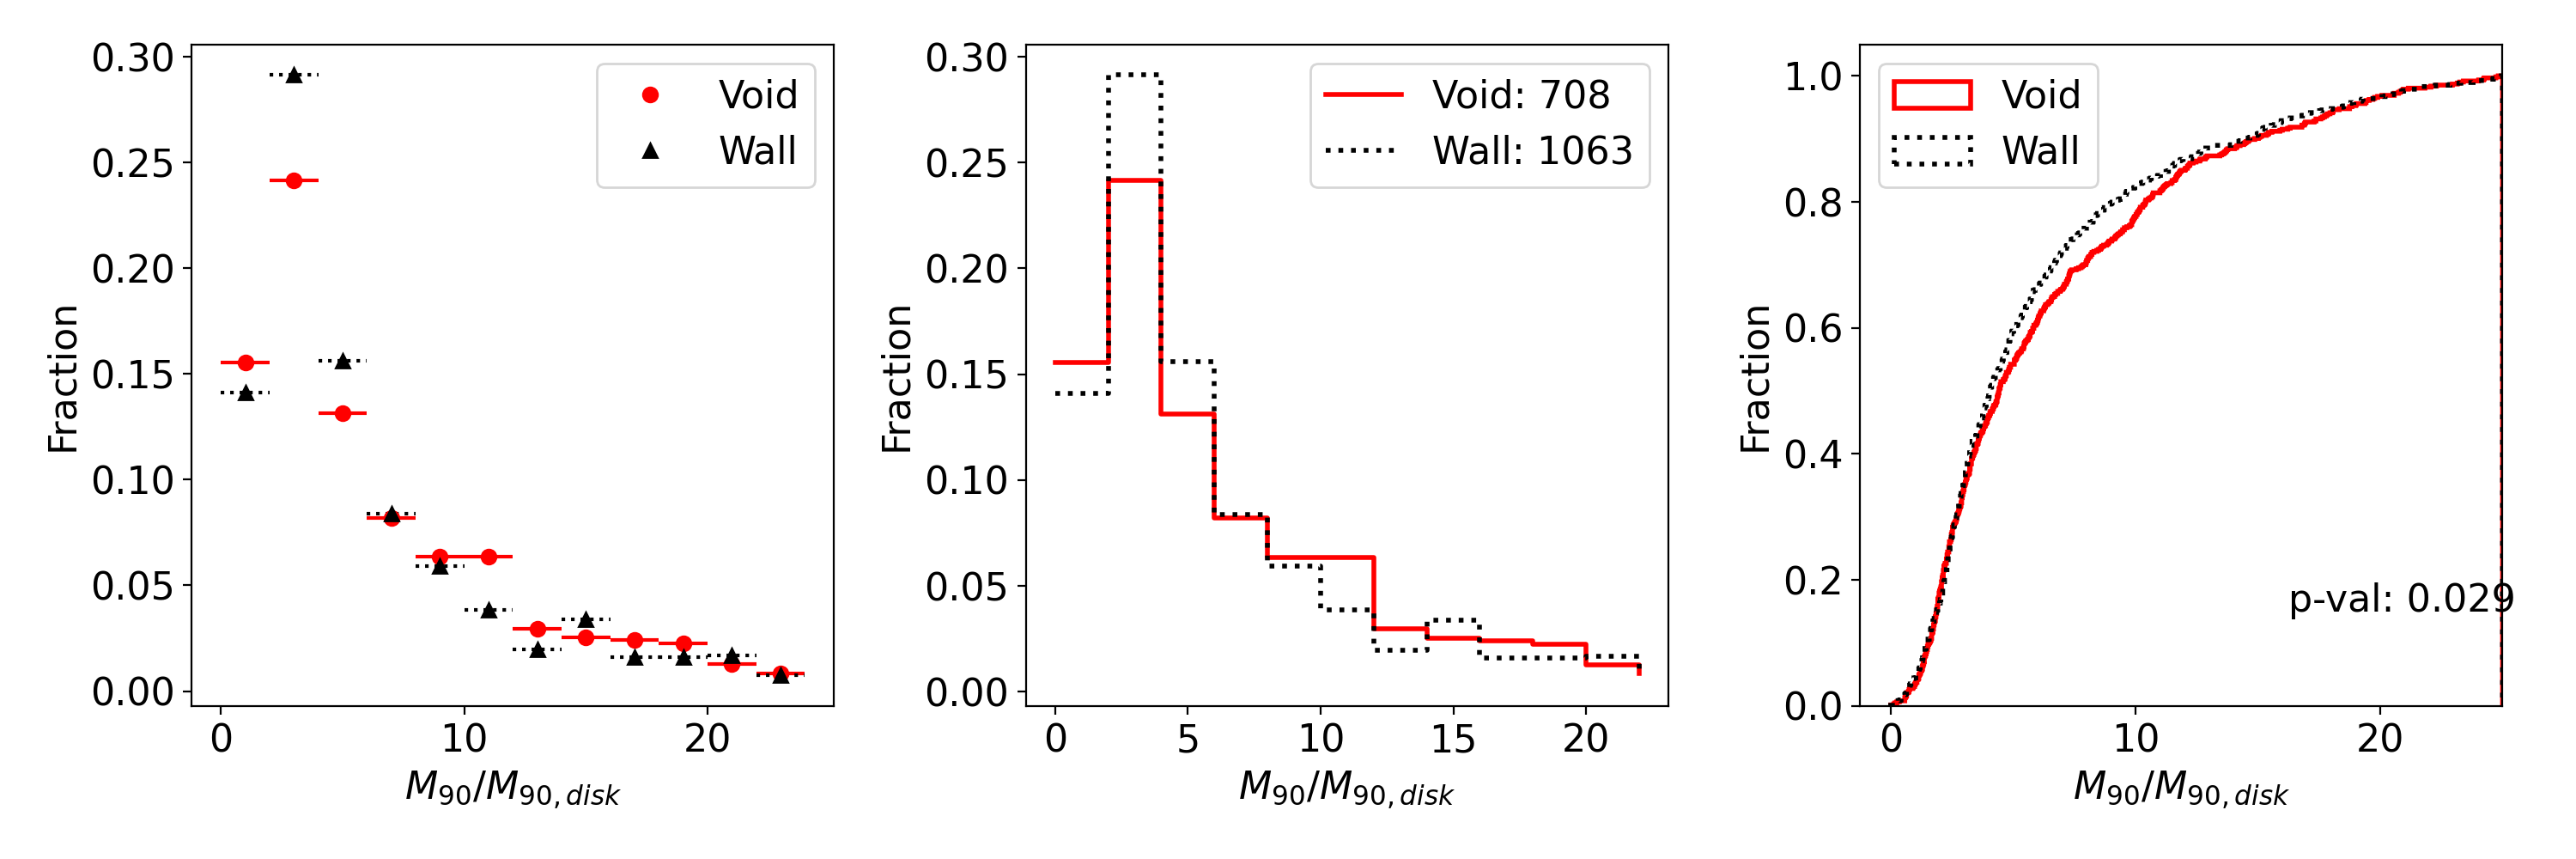

In [27]:
plt.figure(figsize=(15,5))


plt.subplot(131)
param_hist_scatter(void_table, wall_table, 'M90_Mdisk_ratio', mass_ratio_bins)
#plt.xlim([-17,-22])


plt.subplot(132)
param_hist(void_table, wall_table, 'M90_Mdisk_ratio', mass_ratio_bins)
#plt.xlim([-17,-22])


plt.subplot(133)
param_CDF(void_table, wall_table, 'M90_Mdisk_ratio', (0, 25))
plt.xlim(xmax=25)

plt.tight_layout();

# Mass as a function of absolute magnitude

In [7]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18])

## Median mass ratio

In [8]:
'''
void_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['rabsmag'], frac=0.25)
wall_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['rabsmag'], frac=0.25)
'''
void_smooth = lowess(void_table['M90_Mdisk_ratio'], void_table['rabsmag'], frac=0.25)
wall_smooth = lowess(wall_table['M90_Mdisk_ratio'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


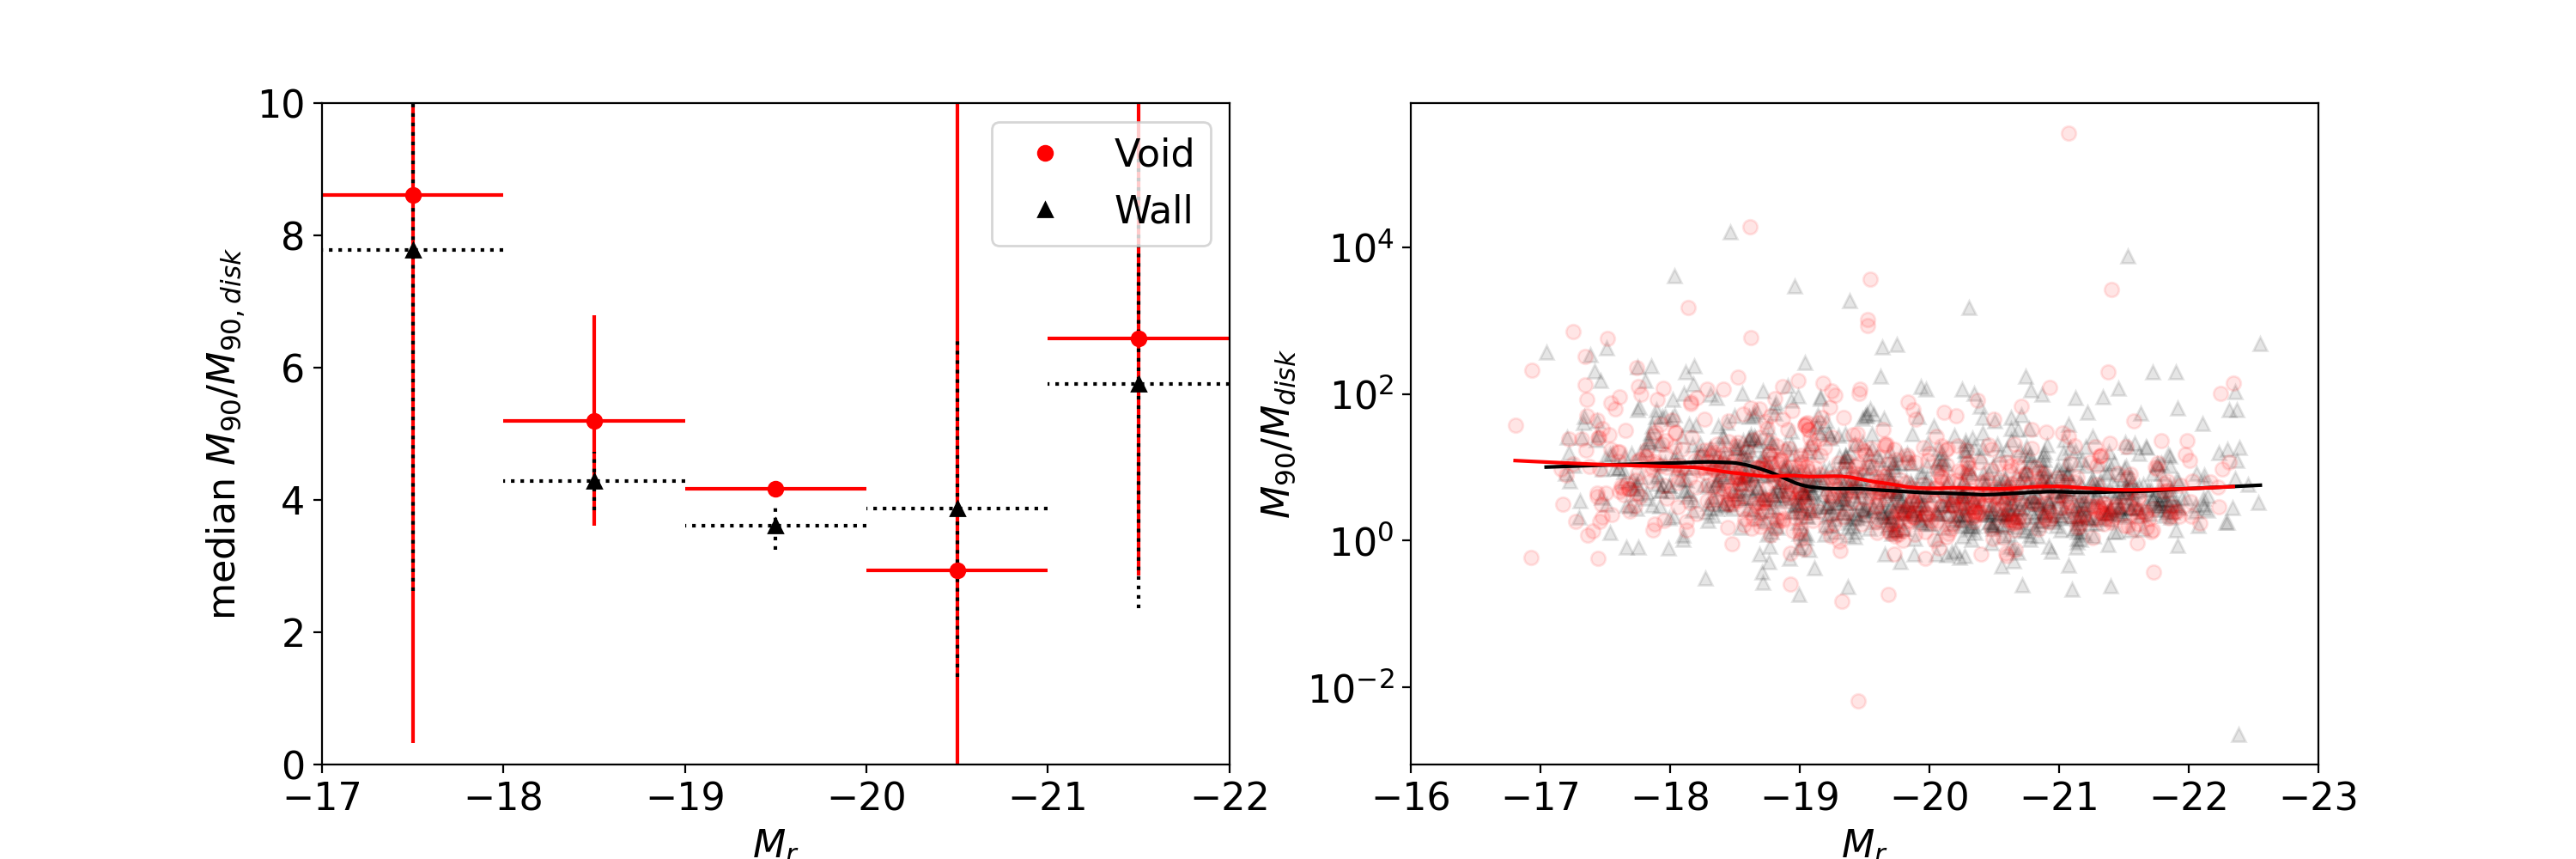

In [9]:
plt.figure(figsize=(15,5))


plt.subplot(121)

#median_hist(void_table, wall_table, 'rabsmag', 'Mdark_Mstar_ratio', rabsmag_bins)
median_hist(void_table, wall_table, 'rabsmag', 'M90_Mdisk_ratio', rabsmag_bins)

plt.xlim(-17,-22)
plt.ylim(0,10)


plt.subplot(122)

#plt.semilogy(wall_table['rabsmag'], wall_table['Mdark_Mstar_ratio'], 'k^', alpha=0.1)
#plt.semilogy(void_table['rabsmag'], void_table['Mdark_Mstar_ratio'], 'ro', alpha=0.1)
plt.semilogy(wall_table['rabsmag'], wall_table['M90_Mdisk_ratio'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['M90_Mdisk_ratio'], 'ro', alpha=0.1)

plt.semilogy(wall_smooth[:,0], wall_smooth[:,1], 'k')
plt.semilogy(void_smooth[:,0], void_smooth[:,1], 'r')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
#plt.ylabel('$M_{DM}$/$M_*$');
plt.ylabel('$M_{90}/M_{disk}$');

## Median total mass, stellar mass

In [10]:
#Mtot_void_smooth = lowess(void_table['Mtot'], void_table['rabsmag'], frac=0.25)
#Mtot_wall_smooth = lowess(wall_table['Mtot'], wall_table['rabsmag'], frac=0.25)
Mtot_void_smooth = lowess(void_table['M90_map'], void_table['rabsmag'], frac=0.25)
Mtot_wall_smooth = lowess(wall_table['M90_map'], wall_table['rabsmag'], frac=0.25)

#Mstar_void_smooth = lowess(void_table['Mstar'], void_table['rabsmag'], frac=0.25)
#Mstar_wall_smooth = lowess(wall_table['Mstar'], wall_table['rabsmag'], frac=0.25)
Mstar_void_smooth = lowess(void_table['M90_disk_map'], void_table['rabsmag'], frac=0.25)
Mstar_wall_smooth = lowess(wall_table['M90_disk_map'], wall_table['rabsmag'], frac=0.25)

<IPython.core.display.Javascript object>


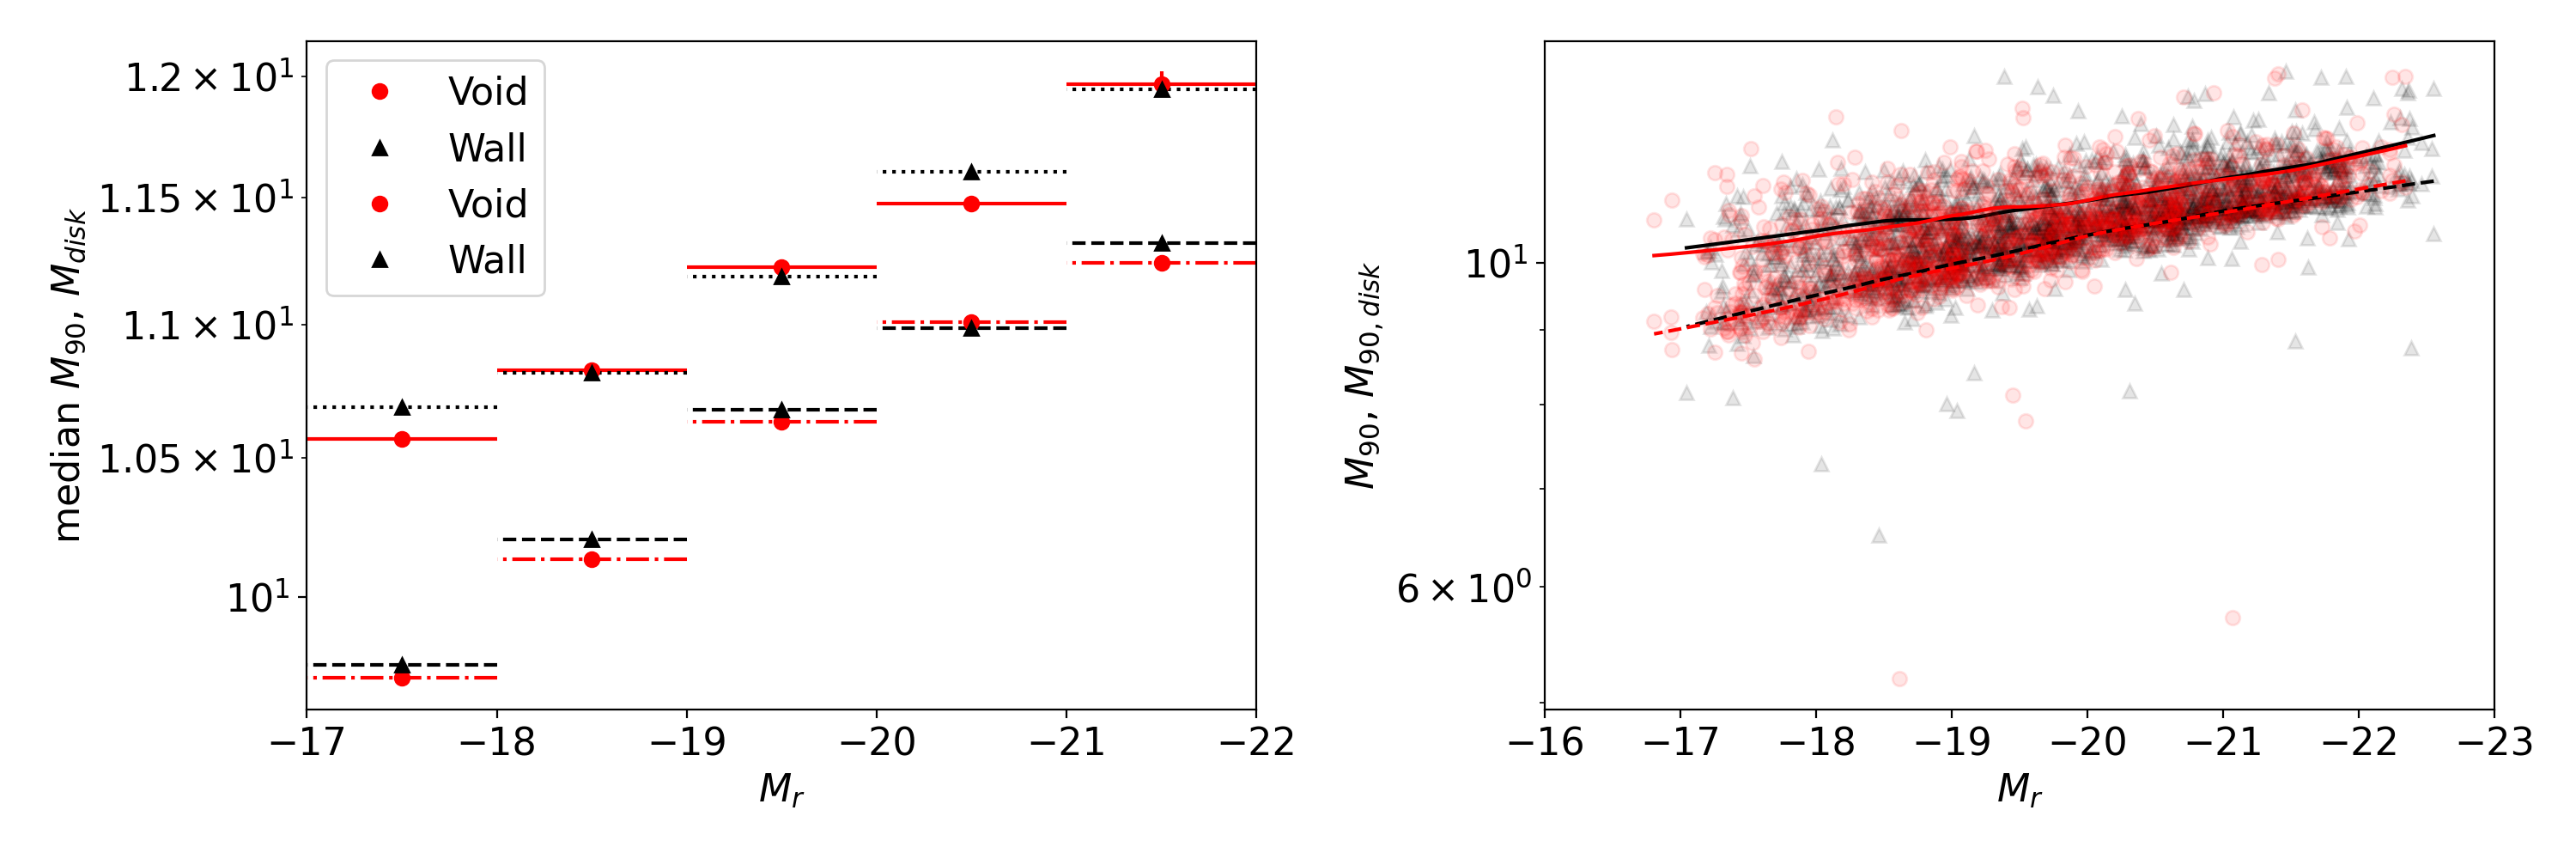

In [12]:
plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

#median_hist(void_table, wall_table, 'rabsmag', 'Mtot', rabsmag_bins)
#median_hist(void_table, wall_table, 'rabsmag', 'Mstar', rabsmag_bins, 
median_hist(void_table, wall_table, 'rabsmag', 'M90_map', rabsmag_bins)
median_hist(void_table, wall_table, 'rabsmag', 'M90_disk_map', rabsmag_bins,
            error_linestyle=['-.', '--'])

plt.yscale('log')
plt.xlim(-17,-22)

#plt.ylabel('median $M_{tot}$, $M_*$')
plt.ylabel('median $M_{90}$, $M_{disk}$')
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

# Total mass
#plt.semilogy(wall_table['rabsmag'], wall_table['Mtot'], 'k^', alpha=0.1)
#plt.semilogy(void_table['rabsmag'], void_table['Mtot'], 'ro', alpha=0.1)
plt.semilogy(wall_table['rabsmag'], wall_table['M90_map'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['M90_map'], 'ro', alpha=0.1)

plt.semilogy(Mtot_wall_smooth[:,0], Mtot_wall_smooth[:,1], 'k')
plt.semilogy(Mtot_void_smooth[:,0], Mtot_void_smooth[:,1], 'r')

# Stellar mass
#plt.semilogy(wall_table['rabsmag'], wall_table['Mstar'], 'k^', alpha=0.1)
#plt.semilogy(void_table['rabsmag'], void_table['Mstar'], 'ro', alpha=0.1)
plt.semilogy(wall_table['rabsmag'], wall_table['M90_disk_map'], 'k^', alpha=0.1)
plt.semilogy(void_table['rabsmag'], void_table['M90_disk_map'], 'ro', alpha=0.1)

plt.semilogy(Mstar_wall_smooth[:,0], Mstar_wall_smooth[:,1], 'k--')
plt.semilogy(Mstar_void_smooth[:,0], Mstar_void_smooth[:,1], 'r--')

plt.xlim(-16,-23)

plt.xlabel('$M_r$')
#plt.ylabel('$M_{tot}$, $M_*$');
plt.ylabel('$M_{90}$, $M_{90,disk}$')
#------------------------------------------------------------------------------

plt.tight_layout();

# Distribution of $M_r$

In [13]:
rabsmag_bins = np.array([-22, -21, -20, -19, -18, -17])

<IPython.core.display.Javascript object>


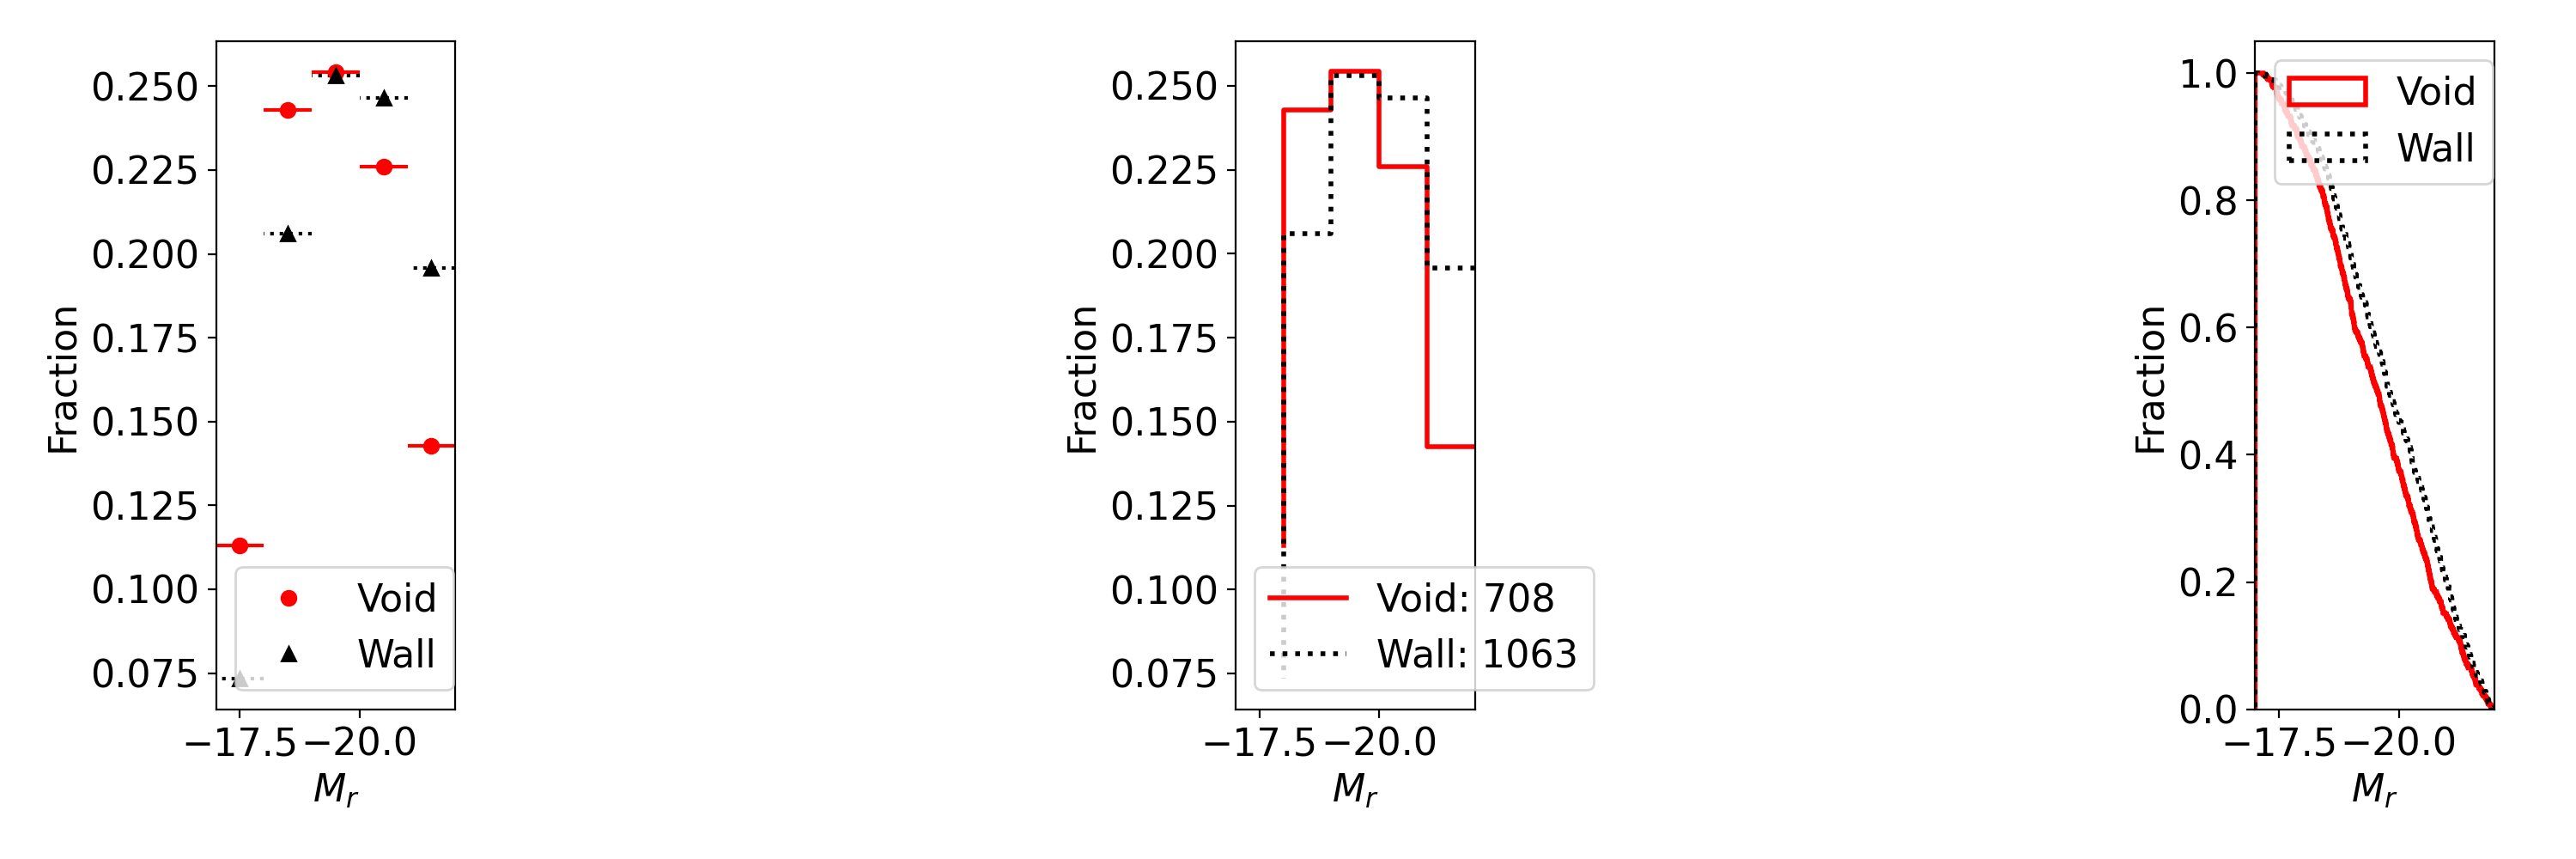

In [29]:
plt.figure(figsize=(15,5))


plt.subplot(131)
param_hist_scatter(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(132)
param_hist(void_table, wall_table, 'rabsmag', rabsmag_bins)
plt.xlim([-17,-22])


plt.subplot(133)
param_CDF(void_table, wall_table, 'rabsmag', (-22, -17))
plt.xlim([-17,-22])

plt.tight_layout();

# Mass ratio v. maximum probed radius

In [17]:
#v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['Rmax'], frac=0.25)
#w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['Rmax'], frac=0.25)
v_smooth = lowess(void_table['M90_Mdisk_ratio'], void_table['Rmax'], frac=0.25)
w_smooth = lowess(wall_table['M90_Mdisk_ratio'], wall_table['Rmax'], frac=0.25)

<IPython.core.display.Javascript object>


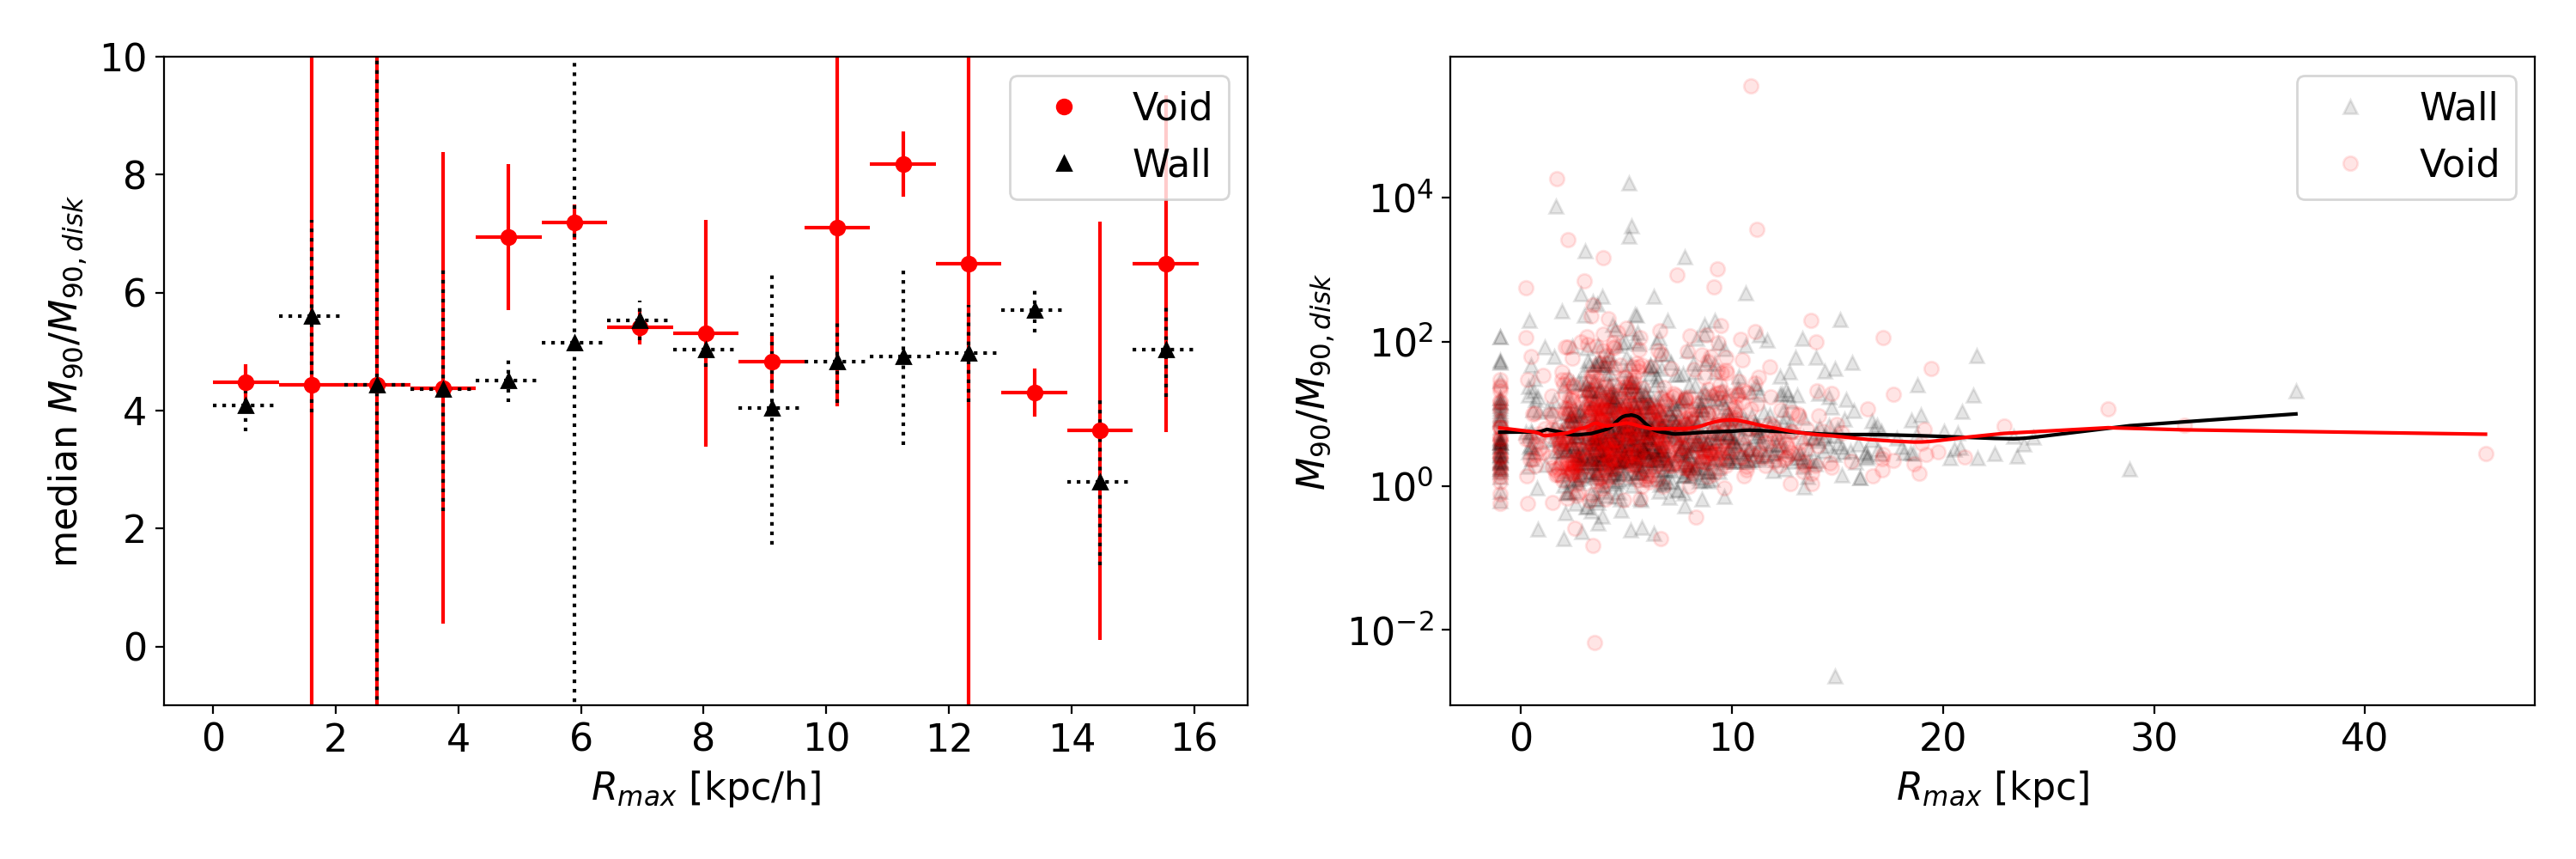

In [18]:
plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

#median_hist(void_table, wall_table, 'Rmax', 'Mdark_Mstar_ratio', 
median_hist(void_table, wall_table, 'Rmax', 'M90_Mdisk_ratio',
            np.linspace(0,15,15))

plt.ylim([-1,10])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['Rmax'], 
             wall_table['M90_Mdisk_ratio'],#wall_table['Mdark_Mstar_ratio'], 
             'k^', 
             alpha=0.1, 
             label='Wall')
plt.semilogy(void_table['Rmax'], 
             void_table['M90_Mdisk_ratio'],#void_table['Mdark_Mstar_ratio'], 
             'ro', 
             alpha=0.1, 
             label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{max}$ [kpc]')
#plt.ylabel('$M_{DM}$/$M_*$')
plt.ylabel('$M_{90}/M_{90,disk}$')

plt.legend()
#------------------------------------------------------------------------------

plt.tight_layout();

In [19]:
#v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['avg_r_turn'], frac=0.25)
#w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['avg_r_turn'], frac=0.25)
v_smooth = lowess(void_table['M90_Mdisk_ratio'], void_table['Rturn_map'], frac=0.25)
w_smooth = lowess(wall_table['M90_Mdisk_ratio'], wall_table['Rturn_map'], frac=0.25)

<IPython.core.display.Javascript object>


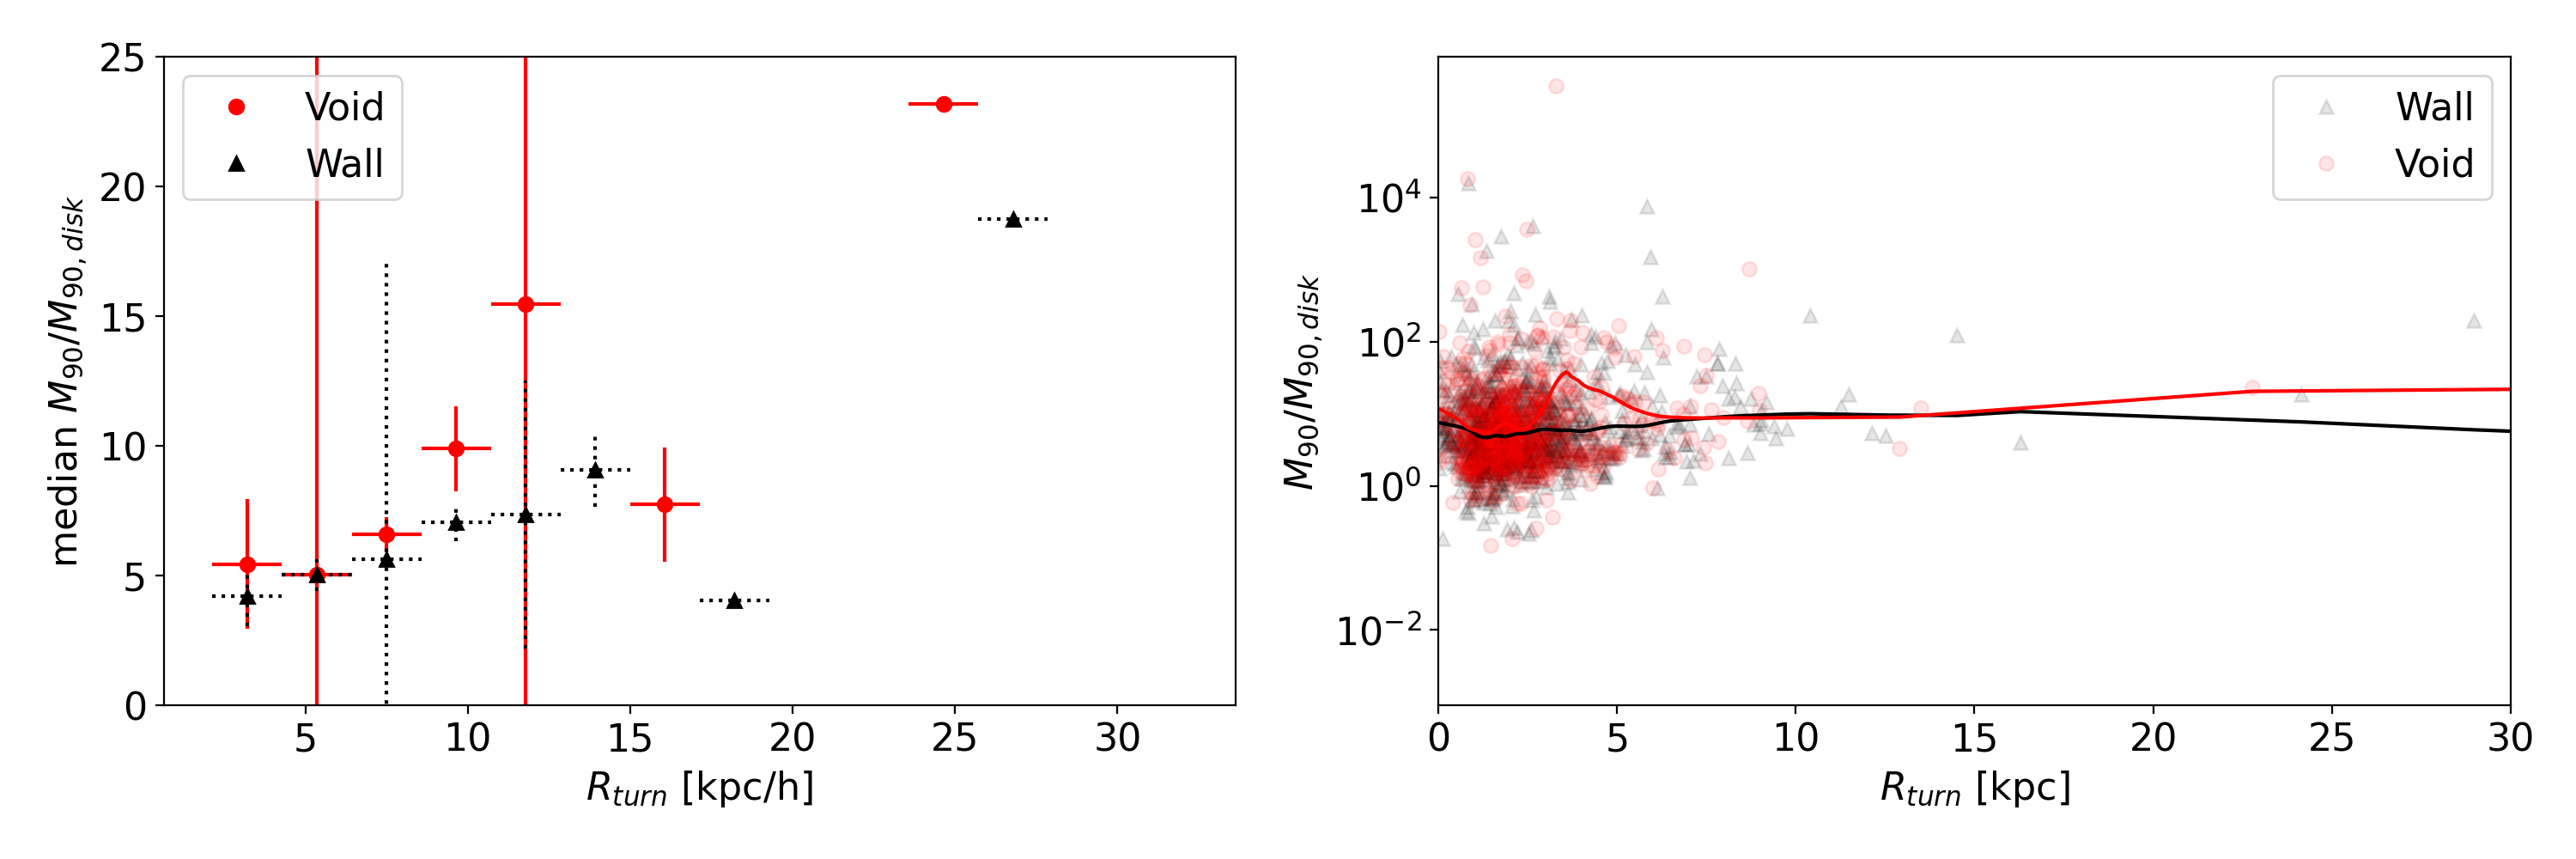

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3370: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [22]:
plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, 
            wall_table, 
            'Rturn_map',#'avg_r_turn', 
            'M90_Mdisk_ratio',#'Mdark_Mstar_ratio', 
            np.linspace(0,30,15))

plt.ylim([0,25])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['Rturn_map'],#wall_table['avg_r_turn'], 
             wall_table['M90_Mdisk_ratio'],#wall_table['Mdark_Mstar_ratio'], 
             'k^', 
             alpha=0.1, 
             label='Wall')
plt.semilogy(void_table['Rturn_map'],#void_table['avg_r_turn'], 
             void_table['M90_Mdisk_ratio'],#void_table['Mdark_Mstar_ratio'], 
             'ro', 
             alpha=0.1, 
             label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{turn}$ [kpc]')
#plt.ylabel('$M_{DM}$/$M_*$')
plt.ylabel('$M_{90}/M_{90,disk}$')

plt.xlim([0,30])

plt.legend()
#------------------------------------------------------------------------------

plt.tight_layout();

In [40]:
v_smooth = lowess(void_table['Mdark_Mstar_ratio'], void_table['Rmax_Rturn_ratio'], frac=0.25)
w_smooth = lowess(wall_table['Mdark_Mstar_ratio'], wall_table['Rmax_Rturn_ratio'], frac=0.25)

<IPython.core.display.Javascript object>


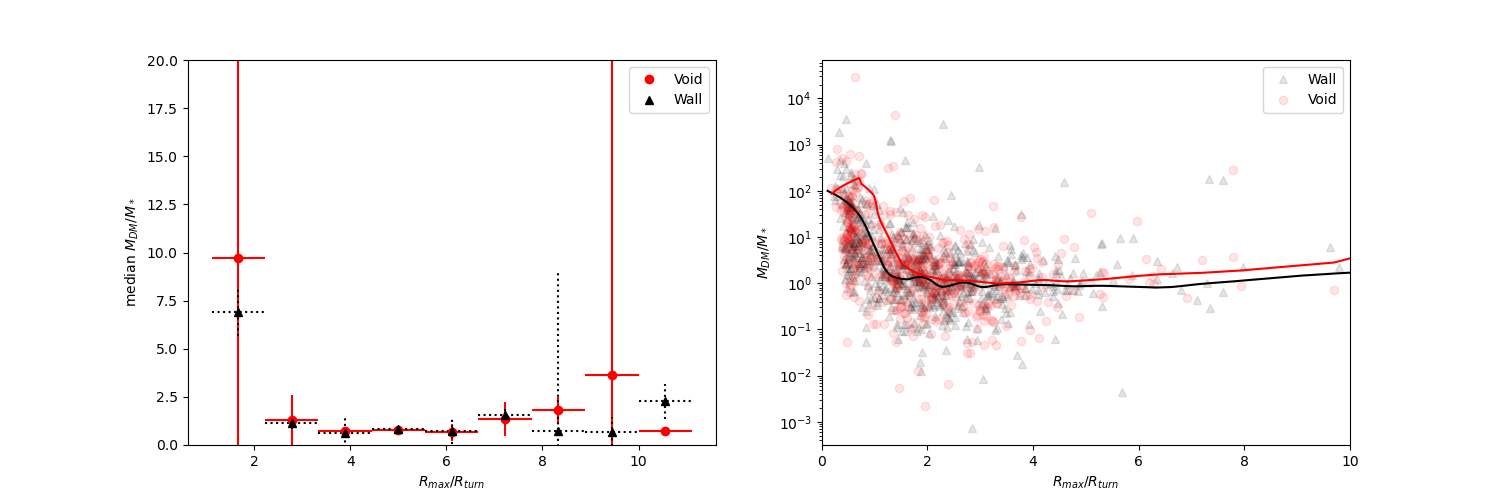

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3332: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
%matplotlib notebook

plt.figure(figsize=(15,5))


#------------------------------------------------------------------------------
plt.subplot(121)

median_hist(void_table, wall_table, 'Rmax_Rturn_ratio', 'Mdark_Mstar_ratio', 
            np.linspace(0,10,10))

plt.ylim([0,20])
#------------------------------------------------------------------------------


#------------------------------------------------------------------------------
plt.subplot(122)

plt.semilogy(wall_table['Rmax_Rturn_ratio'], wall_table['Mdark_Mstar_ratio'], 'k^', 
             alpha=0.1, label='Wall')
plt.semilogy(void_table['Rmax_Rturn_ratio'], void_table['Mdark_Mstar_ratio'], 'ro', 
             alpha=0.1, label='Void')

plt.plot(w_smooth[:,0], w_smooth[:,1], 'k')
plt.plot(v_smooth[:,0], v_smooth[:,1], 'r')

plt.xlabel('$R_{max}$/$R_{turn}$')
plt.ylabel('$M_{DM}$/$M_*$')

plt.xlim([0,10])

plt.legend();
#------------------------------------------------------------------------------

# Messing around

After loosening the limits on $R_{turn}$ and $V_{max}$ in the fits, some of the mass ratios have become ridiculously large.  Below is me just playing around to try and figure out where things are funky and how to best fix them.

In [33]:
good_galaxies[good_galaxies['Mdark_Mstar_ratio']>1000]

MaNGA_plate,MaNGA_IFU,NSA_plate,NSA_fiberID,NSA_MJD,NSA_index,NSA_RA,NSA_DEC,NSA_ba,NSA_phi,NSA_redshift,NSA_Mstar,vflag,avg_v_max,avg_v_max_sigma,avg_alpha,avg_alpha_sigma,avg_chi_square_rot,pos_v_max,pos_v_max_sigma,pos_alpha,pos_alpha_sigma,pos_chi_square_rot,neg_v_max,neg_v_max_sigma,neg_alpha,neg_alpha_sigma,neg_chi_square_rot,center_flux,center_flux_error,Mtot,Mtot_error,Mdark,Mdark_error,Mstar,Mdark_Mstar_ratio,Mdark_Mstar_ratio_error,rabsmag,avg_r_turn,avg_r_turn_sigma,pos_r_turn,pos_r_turn_sigma,neg_r_turn,neg_r_turn_sigma,logNO,t3,BPT,curve_used,points_cut,avg_chi_square_ndf,pos_chi_square_ndf,neg_chi_square_ndf,index,Z12logOH,u_r,frac_masked_spaxels,Rmax,Mtot_Mstar_ratio,Mtot_Mstar_ratio_error,smoothness_score,CMD_class,Mstar_turn,SFR,sSFR,pos_Vmax_data,avg_Vmax_data,neg_Vmax_data
int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
8944,9102,1948,544,53388,413011,149.9021238713291,34.32021860729502,0.767438530921936,16.3319091796875,0.020907936617732048,1321555584.0,0.0,2774.121356149208,25518.210335694286,0.694479752367536,1.8513939673178987,5.034908567709779,126.88021144795357,18.04880061028335,2.463372295687476,1.0211677313758656,33.82525611431743,432.7220958012382,5185687445.248177,16.877514989220224,110923960.77081425,75.89799491944409,0.04546554014086723,0.00140158061843926,7068706009570.889,130045303428210.12,7066512627616.441,130045303428210.12,2193381954.447666,3221.742849341495,59289.85745711486,-18.182580947875977,63.77730595568013,564.6403720678708,2.758424659968559,0.2769873808304425,11.472752452038323,137488031.2168721,-99.0,-99.0,1.0,0,0,0.5034908567709779,3.3825256114317432,7.589799491944409,1852873,-99.0,1.194717288017273,0.04852758191621734,3.9504820874260007,3222.742849341495,59289.85745711486,1.292120111227659,1,1977357643.3579788,-1.0331491231918335,-10.323923110961914,110.82622943254147,142.43749056380258,-8.079405938074606
8941,12701,929,323,52581,173478,120.06360413136585,27.58998854067836,0.6931057572364807,122.7322998046875,0.022945469245314598,1319126528.0,2.0,2889.1791248199797,43525.185770062555,0.38674787704633073,1.5471337887951035,50.28271751068041,93.11112466226079,13.857652153073527,2.4911632201547294,1.9250926328285116,149.78481231944843,658.2539453003714,8244.809422378055,0.765000853941725,5.810825279106657,295.0146981682616,0.014148479327559471,0.00073792069951752,9708935596458.889,292528228405979.75,9705399397661.072,292528228405979.75,3536198797.815583,2744.585345048019,82723.92055183189,-17.924226760864258,31.586014667942475,393.0902718832346,1.740721220727274,0.24226188288404746,8.736507632278514,81.44333173830904,-99.0,-99.0,2.0,0,3,5.586968612297824,16.64275692438316,32.77941090758462,861224,-99.0,1.669115275144577,0.16088137639601569,5.002461702159559,2745.585345048019,82723.92055183189,1.6962056331497302,1,1338101788.0075288,-1.0575430393218994,-10.306276321411133,462.2410886071945,569.0079565567022,-19.302347611084482
8727,12703,463,319,51908,55260,56.34767883262604,-6.45912777953606,0.17632457613945007,117.15200805664062,0.01743924617767334,853767168.0,-9.0,99999.99914622173,4402551.526726437,0.16590972531850492,0.9320422296728818,10.738776884095213,75.09089789111776,39.29553011330433,0.9335112888784185,0.8300923432551762,34.25053682122814,73.57378799049414,2.2438854889577957,492.04629570355274,298249923.8494359,17.076222337932894,0.025385653600096703,0.000929379240823609,9429358864996008.0,8.3026477243144e+17,9429357416181278.0,8.3026477243144e+17,1448814730.1803746,6508325.198355308,573064833.7127782,-17.77788352

In [34]:
avg_good_galaxies = good_galaxies[good_galaxies['curve_used'] == 0]
pos_good_galaxies = good_galaxies[good_galaxies['curve_used'] == 1]
neg_good_galaxies = good_galaxies[good_galaxies['curve_used'] == -1]

<IPython.core.display.Javascript object>


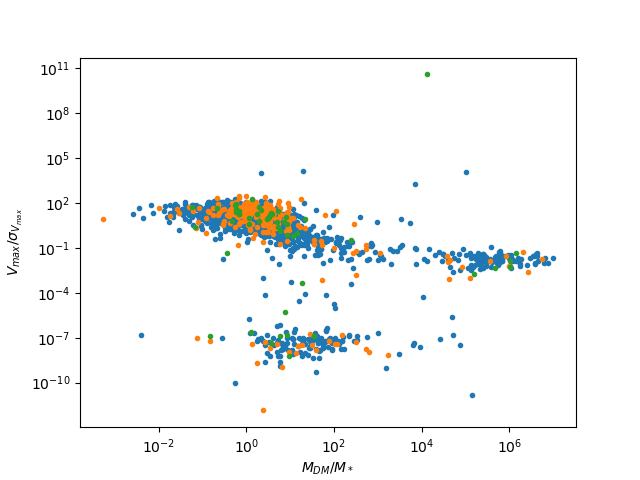

In [35]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['Mdark_Mstar_ratio'], avg_good_galaxies['avg_v_max']/avg_good_galaxies['avg_v_max_sigma'], 
         '.')
plt.loglog(pos_good_galaxies['Mdark_Mstar_ratio'], pos_good_galaxies['pos_v_max']/pos_good_galaxies['pos_v_max_sigma'], 
         '.')
plt.loglog(neg_good_galaxies['Mdark_Mstar_ratio'], neg_good_galaxies['neg_v_max']/neg_good_galaxies['neg_v_max_sigma'], 
         '.')

plt.xlabel('$M_{DM}$/$M_*$')
plt.ylabel('$V_{max}$/$\sigma_{V_{max}}$');

<IPython.core.display.Javascript object>


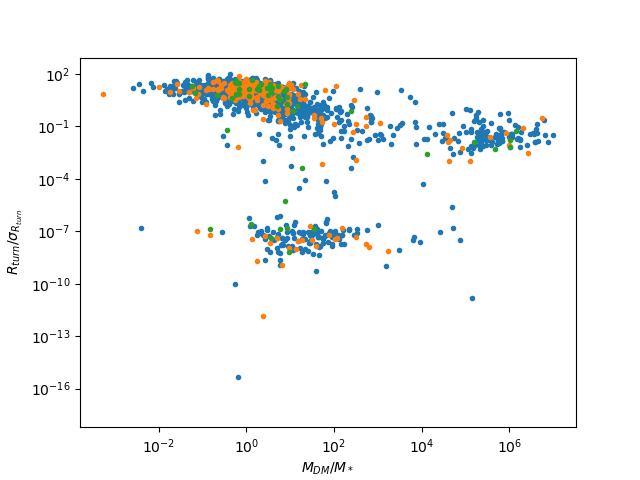

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [36]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['Mdark_Mstar_ratio'], 
           avg_good_galaxies['avg_r_turn']/avg_good_galaxies['avg_r_turn_sigma'], 
           '.')
plt.loglog(pos_good_galaxies['Mdark_Mstar_ratio'], 
           pos_good_galaxies['pos_r_turn']/pos_good_galaxies['pos_r_turn_sigma'], 
           '.')
plt.loglog(neg_good_galaxies['Mdark_Mstar_ratio'], 
           neg_good_galaxies['neg_r_turn']/neg_good_galaxies['neg_r_turn_sigma'], 
           '.')

plt.xlabel('$M_{DM}$/$M_*$')
plt.ylabel('$R_{turn}$/$\sigma_{R_{turn}}$');

<IPython.core.display.Javascript object>


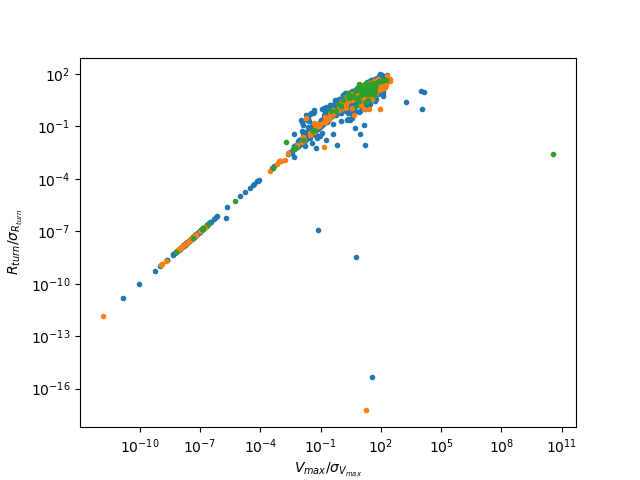

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [37]:
%matplotlib notebook

plt.loglog(avg_good_galaxies['avg_v_max']/avg_good_galaxies['avg_v_max_sigma'], 
           avg_good_galaxies['avg_r_turn']/avg_good_galaxies['avg_r_turn_sigma'], 
           '.')
plt.loglog(pos_good_galaxies['pos_v_max']/pos_good_galaxies['pos_v_max_sigma'], 
           pos_good_galaxies['pos_r_turn']/pos_good_galaxies['pos_r_turn_sigma'], 
           '.')
plt.loglog(neg_good_galaxies['neg_v_max']/neg_good_galaxies['neg_v_max_sigma'], 
           neg_good_galaxies['neg_r_turn']/neg_good_galaxies['neg_r_turn_sigma'], 
           '.')

plt.xlabel('$V_{max}$/$\sigma_{V_{max}}$')
plt.ylabel('$R_{turn}$/$\sigma_{R_{turn}}$');